In [1]:
# Required Libraries
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import pandas as pd

In [2]:
# Load data from the .mat file
Data_2d = loadmat('ex6data3.mat')

Xval = Data_2d['Xval']
yval = np.squeeze(Data_2d['yval'])
X = Data_2d['X']
y = np.squeeze(Data_2d['y'])

# Convert data to pandas DataFrame for easier inspection
Data_Df = pd.DataFrame({'X first column':X[:,0],'X second column':X[:,1], 'Y': y})
Data_DF_Val = pd.DataFrame({'X-val first column':Xval[:,0],'X-val second column':Xval[:,1], 'Y-val': yval})

indices_y_eq_1 = np.where(y==1)[0]
indices_y_eq_0 = np.where(y==0)[0]

# Find indices where y is 1 or 0
X_eq_1 = X[indices_y_eq_1]
X_eq_0 = X[indices_y_eq_0]

# Print data for inspection
print(Data_Df)
print(Data_DF_Val)

     X first column  X second column  Y
0         -0.158986         0.423977  1
1         -0.347926         0.470760  1
2         -0.504608         0.353801  1
3         -0.596774         0.114035  1
4         -0.518433        -0.172515  1
..              ...              ... ..
206       -0.399885        -0.621930  1
207       -0.124078        -0.126608  1
208       -0.316935        -0.228947  1
209       -0.294124        -0.134795  0
210       -0.153111         0.184503  0

[211 rows x 3 columns]
     X-val first column  X-val second column  Y-val
0             -0.353062            -0.673902      0
1             -0.227126             0.447320      1
2              0.092898            -0.753524      0
3              0.148243            -0.718473      0
4             -0.001512             0.162928      0
..                  ...                  ...    ...
195            0.005203            -0.544449      1
196            0.176352            -0.572454      0
197            0.127651     

In [4]:
# Initialize hyperparameters and variables for model selection
list_num = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
pair_list = {}
min_value = 100
tolerance = 0.001
max_iterations = 1000

# Hyperparameter tuning for RBF kernel SVM
for i in list_num:
    for j in list_num:
        paired = (i,j)
        C_value = i
        sigma_value = j
        gamma_value = 1/(2*sigma_value**2)
        RBF_model_val = SVC(kernel='rbf', C = C_value, gamma = gamma_value, tol=tolerance, max_iter= max_iterations)
        RBF_model_val.fit(X,y)
        Y_predicted = RBF_model_val.predict(Xval)
        error = np.mean(Y_predicted != yval)
        pair_list[error] = (C_value,sigma_value)

In [8]:
# Find the best hyperparameters with minimum error
C_value_min, sigma_value_min = pair_list[min_value]
gamma_value = 1/(2*sigma_value_min**2)
print(sigma_value_min)
print("the min error value: ",min_value)
print("the min error c value: [%s] \nthe min error sigma value: [%s] "%(C_value_min, sigma_value_min))

# Train final model with the best hyperparameters
RBF_model_val = SVC(kernel='rbf', C = C_value_min, gamma = gamma_value, tol=tolerance, max_iter= max_iterations)
RBF_model_val.fit(X,y)
Y_predicted = RBF_model_val.predict(Xval)
accuracy = accuracy_score(Y_predicted,yval)
print("accuracy is: ",accuracy)

# Save the trained model
joblib.dump(RBF_model_val, 'svm_model_RBF_with_val.joblib')

0.1
the min error value:  0.035
the min error c value: [3] 
the min error sigma value: [0.1] 
accuracy is:  0.965


['svm_model_RBF_with_val.joblib']

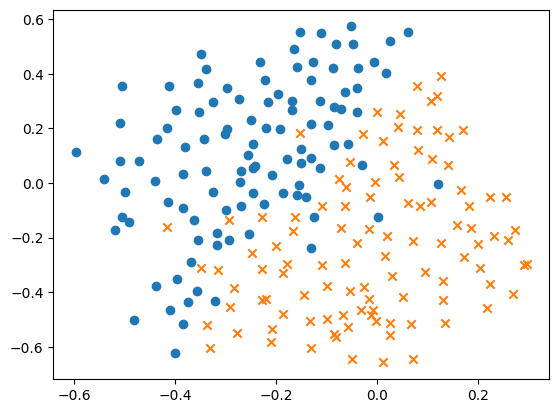

In [6]:
# Plotting the data points and decision boundary
plt.scatter(X_eq_1[:, 0], X_eq_1[:, 1], marker = 'o')
plt.scatter(X_eq_0[:, 0], X_eq_0[:, 1], marker = 'x')
plt.show()

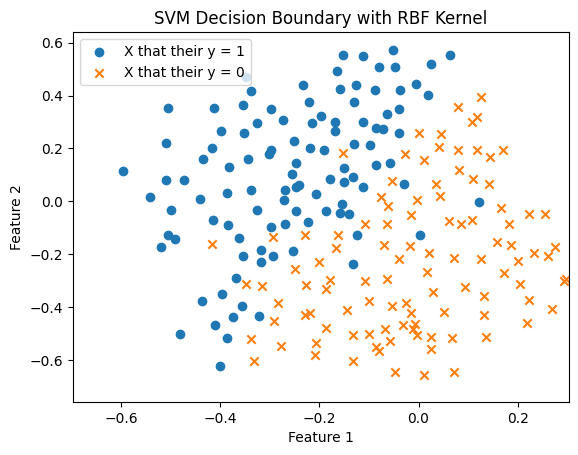

In [7]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

Z = RBF_model_val.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


title = ('Decision surface of linear SVC ')

# Plot decision boundary
plt.contour(xx, yy, Z, levels=[0], colors='b')
plt.scatter(X_eq_1[:, 0], X_eq_1[:, 1], marker='o', label='X that their y = 1')
plt.scatter(X_eq_0[:, 0], X_eq_0[:, 1], marker='x', label='X that their y = 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.legend()
plt.show()